230419 Dimensionality Reduction

---


-  : 공간 내 데이터의 위치를 나타내기 위해 필요한 축의 개수

차원과 변수
- 데이터가 n개의 설명변수를 가진다면 n차원의 좌표 상에서 표현 할 수 있음


차원의 저주(Curse of Dimensionality)
변수가 늘어나면서 차원이 커짐에 따라 발생하는 문제
- 필요한 데이터 수의 지수 함수적 증가로 인한 정보의 밀도 감소
- 공간을 설명하기 위한 데이터의 부족
- 과적합 문제 & 성능 감소

차원 축소(Dimensionality Reduction)
- 데이터를 잘 설명할 수 있는 변수의 개수(Latent Space)는 현재 변수의 개수(Observation Space)보다 작을 수 있음
- 데이터를 기반으로 잠재 공간을 파악하는 것


차원 축소(Dimensionality Reduction)의 효과
1) 차원의 저주 해결
2) 연산량 감소
3) 시각화 용이


* STEP
1. 변수 선택 (Feature Selection)
- 원본 데이터의 변수 중 불필요한 변수를 제거하는 방법
- 몸무게, 키, 머리 길이 -> 몸무게, 키
2. 변수 추출 (Feature Extraction)
- 원본 데이터의 변수들을 조합해 새로운 변수를 생성하는 방법
- 키, 몸무게, 머리 길이 -> 체구, 머리 길이
- 체구 = 0.3 * 몸무게 + 0.7 * 키



변수 추출 방법
1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)
3. t-distributed Stochastic Neighbor Embedding (t-SNE)


### Principal Component Analysis (PCA)
-  변수의 정보를 담고있는 주성분(Principal Component)이라는 새로운 변수를 생성하는 차원 축소 기법
- 단순히 차원을 줄이기 보다는 관측된 차원이 아닌 실제 이터를 설명하는 차원을 찾아서 데이터를 더 잘 이해하고자 함

분산(Variance)을 최대로 보존하는 초평면(Hyperplane) 선택
- 원본 데이터 셋과 투영된 초평면의 평균제곱거리를 최소화
- 정보를 가장 적게 손실하기 때문

- 첫 번째 주성분 : 분산을 가장 크게 하는 축
- 두 번째 주성분 : 첫 번째 주성분에 직교하면서 남은 분산을 최대로 보존하는 두 번째 축


+) 주성분 축을 찾는 방법 (시험에서는 필요없을 듯)
1. 데이터 표준화 
- 데이터를 표준화 하지 않으면 값의 크기에 따라 공분산이 영향을 받음
2. 공분산 행렬 생성
3. 고유값 분해(Eigen Decomposition)
4. K개 벡터의 새로운 Basis 선택
- 1) Scree Plot -> Elbow Point
- 2) Explained Variance -> Explained Variance Cutoff

PCA의 장점
- 변수간 상관관계 및 연관성을 이용해 변수를 생성
- 차원 축소로 차원의 저주를 해결가능
PCA의 단점
- 데이터에 선형성이 없다면 적용할 수 X.
- 데이터의 클래스를 고려하지 않기 때문에 최대 분산 방향이 특징 구분을 좋게 한다고 보장할 수 X
- 주성분의 해석을 위한 도메인 지식이 필요


### LDA (Linear Discriminant Analysis)
- 데이터의 분포를 학습하여 분리를 최적화하는 결정 경계를 만들어 데이터를 분류하는 모델

- LDA 목표
 : 클래스 간의 분산을 크게, 클래스 내의 분산을 작게 한다
 
 
PCA vs. LDA
- 공통점 : PCA와 LDA는 Eigen Decomposition을 기반으로 데이터를 새로운 축에 선형으로 projection 시키는 과정
- PCA(비지도) : 데이터 전체의 분포를 참고 -> 새로운 basis 설정 -> 그 축에 맞게 데이터를 새롭게 projection
- LDA(지도) : 지도적인 방법으로 Basis를 찾아 -> 그 축을 분리에 이용 -> 최적의 분리를 완성한 뒤 projection


### t-Stochastic Neighbor Embedding (t-SNE)
- 고차원의 데이터를 저차원의 데이터로 거리 관계를 유지하며 Projection 하는 기법

t-SNE 학습 방법
1. 랜덤 순서로 나열
2. 데이터 하나에 대해서 동일 군집은 당기는 힘 / 다른 군집은 미는 힘 계산
3. 데이터를 힘의 균형에 맞는 위치로 이동
4. 모든 점들에 대해서 2~3 과정 반복

t-SNE 장점
- 직관적으로 데이터의 구조를 시각화하여 확인할 수 있다.
t-SNE 단점
- 거리를 학습하여 계속 업데이트 하기 때문에 값이 매번 바뀜
- PCA와 LDA와 다르게 결과를 변수로 사용할 수 없다.
- 데이터 수가 많아지면 시간이 오래 걸림

# 차원 축소 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

### 1.1 Data Load

In [89]:
# 손글씨 데이터 (8*8 image)

from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]

In [4]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [5]:
data[0].shape

(64,)

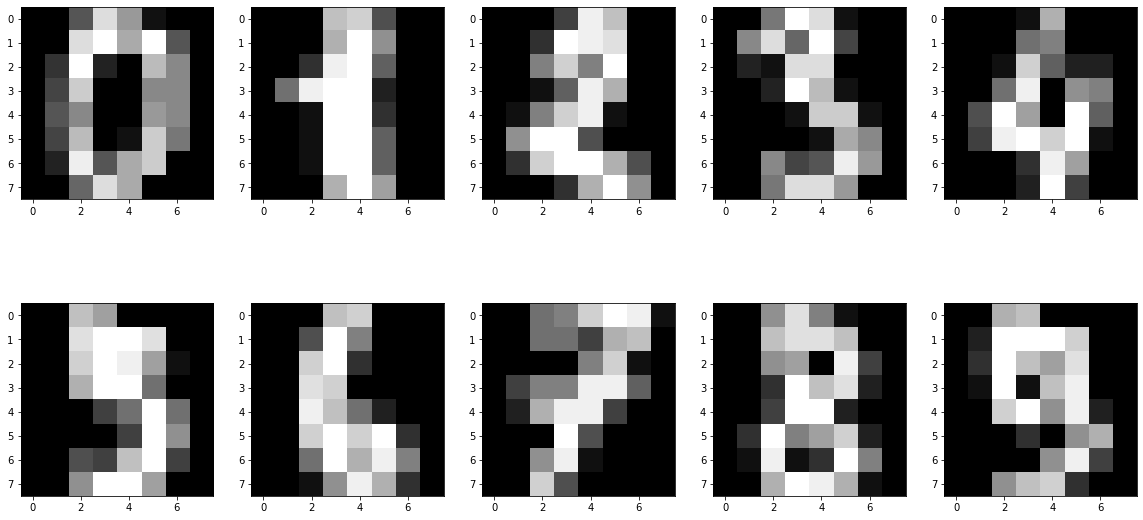

In [6]:
# 실제 data 확인
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

### 1.2 데이터 정규화

why? ) PCA는 데이터의 크기에 영향 받음 --> 정규화 필수

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
scaled_data = scaler.fit_transform(data)

## 2. PCA

### 2.1 학습

In [9]:
from sklearn.decomposition import PCA

pca = PCA()

In [10]:
pca.fit(scaled_data)

PCA()

### 2.2 설명된 분산

PCA : 첫 번째 주성분이 가장 크며 갈수록 작아짐

In [11]:
pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

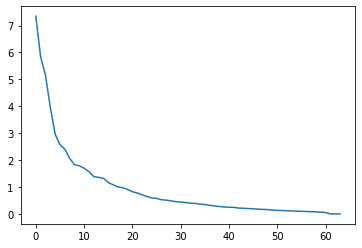

In [12]:
plt.plot(pca.explained_variance_)

### 2.3 설명된 분산의 비율

In [13]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

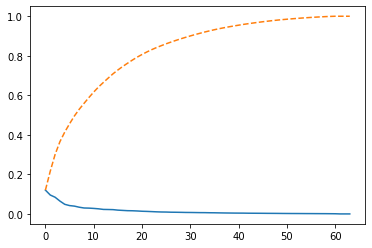

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle="--")

## 3. 제한된 PCA

실제로는 데이터의 모든 분산을 분리해서 사용 X

--> 1) 분산 개수를 지정하거나 2)설명되는 분산을 제한하는 방식

### 3.1 비율로 사용하는 방법

`n_components` argument : int와 float을 입력으로 받음  

- 0~1 사이 (float) : 설명된 분산이 해당 값에 도달할 때까지 주성분 선택
- 1 이상 (int): 지정된 개수만큼의 주성분 계산

In [15]:
ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_data)

PCA(n_components=0.8)

In [16]:
ratio_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [17]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

이때 선택된 주성분은? : 21개

In [18]:
ratio_pca.n_components_

21

### 3.2 개수 지정해서 사용하는 방법

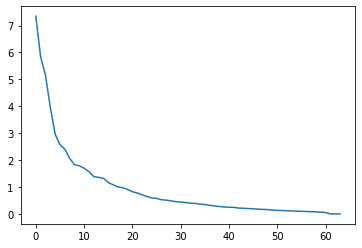

In [19]:
plt.plot(pca.explained_variance_)

ex) elbow point인 8개의 주성분만 선택하는 경우

In [20]:
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_data)

PCA(n_components=8)

In [21]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444414, 0.06498392, 0.04860127,
       0.04214067, 0.03941842, 0.03388898])

In [22]:
n_comp_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.2159497 , 0.30039384, 0.36537776, 0.41397902,
       0.45611969, 0.49553812, 0.52942709])

In [23]:
n_comp_pca.n_components_

8

### 3.3 시각화

PCA를 이용해 데이터를 시각화 할 때

보통 2차원/3차원으로 데이터 축소 후 시각화 

(why? 사람이 인식할 수 있는 차원의 최대 크기=3)

In [24]:
viz_pca = PCA(n_components=2)
viz_pca_latent = viz_pca.fit_transform(scaled_data)

In [25]:
def visualize_latent_space_with_label(latent):
    for label in np.unique(target):
        index = target == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

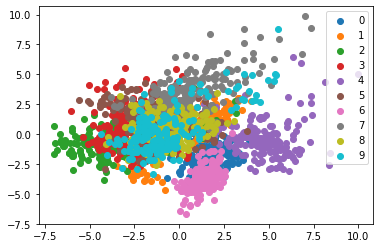

In [26]:
visualize_latent_space_with_label(viz_pca_latent)

## 4. LDA

LDA의 전체적인 과정은 PCA와 유사

차이) LDA는 학습시 label 부여

### 4.1 학습

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [28]:
lda.fit(scaled_data, target)

LinearDiscriminantAnalysis()

### 4.2 설명된 분산

LDA는 eigenvalue처럼 분산의 크기를 나타내는 값 없음  

설명된 분산의 크기만 확인 가능

In [29]:
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

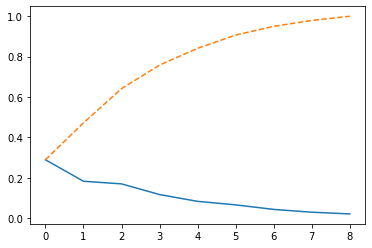

In [30]:
plt.plot(lda.explained_variance_ratio_)
plt.plot(lda.explained_variance_ratio_.cumsum(), linestyle="--")

### 4.2 시각화

In [31]:
viz_lda = LinearDiscriminantAnalysis(n_components=2)
viz_lda_latent = viz_lda.fit_transform(scaled_data, target)

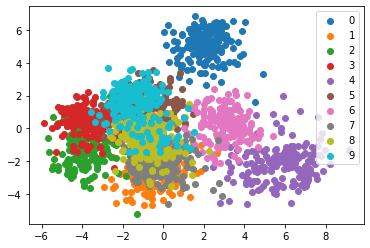

In [32]:
visualize_latent_space_with_label(viz_lda_latent)

## 4. T-SNE

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

### 4.1 시각화

In [34]:
tsne_latent = tsne.fit_transform(scaled_data)

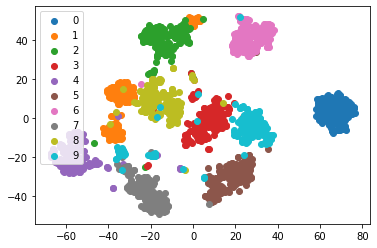

In [35]:
visualize_latent_space_with_label(tsne_latent)

## 5.마무리

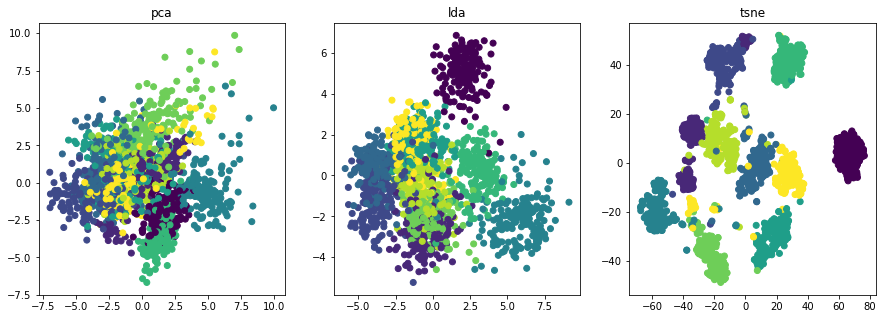

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
latents = [
    ("pca", viz_pca_latent),
    ("lda", viz_lda_latent),
    ("tsne", tsne_latent)
]
for idx, (name, latent) in enumerate(latents):
    ax = axes[idx]
    ax.scatter(latent[:, 0], latent[:, 1], c=target)
    ax.set_title(name)

---


# 차원 축소와 군집화

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

### 1.1 Data Load

In [38]:
from sklearn.datasets import load_digits

digits = load_digits()

In [39]:
data, target = digits["data"], digits["target"]

In [40]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

### 1.2 데이터 정규화 (★★★)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [42]:
scaled_data = scaler.fit_transform(data)

### 1.3 시각화

TSNE를 이용해 시각화 데이터를 생성

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [44]:
tsne_latent = tsne.fit_transform(scaled_data)

In [45]:
def visualize_latent_space_with_label(latent, pred):
    for label in np.unique(pred):
        index = pred == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

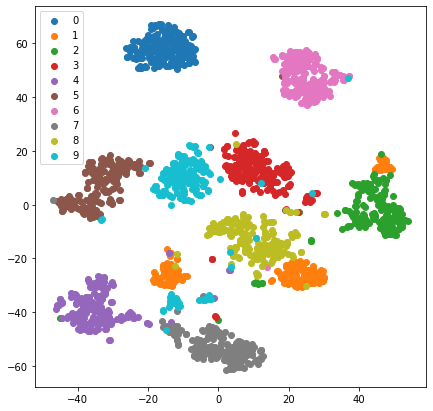

In [46]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, target)

## 2. Clustering

데이터에 다른 처리 없이 Kmeans로 군집화

k means 의 k -> 정답을 알고 있는 상태

10으로 줘서 실제로 잘 군집이 되는지 확인해보자

### 2.1 학습

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

In [48]:
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

### 2.2 예측

In [49]:
pred = kmeans.predict(scaled_data)

### 3.3 시각화

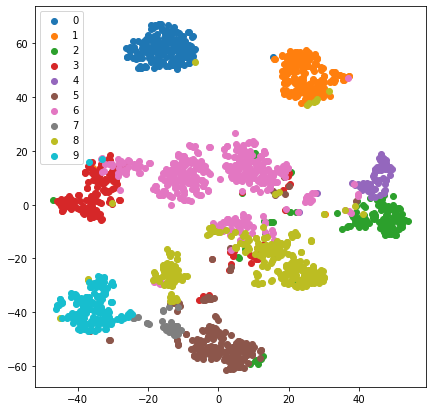

In [50]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pred)

## 3. PCA & Clustering

차원축소 후 군집화 진행하면?

### 3.1 PCA 데이터 생성

차원축소시킨 데이터 생성

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(scaled_data)

PCA(n_components=12)

In [52]:
pca_data = pca.transform(scaled_data)

### 3.2 K Means 학습

In [53]:
pca_kmeans = KMeans(n_clusters=10)

pca_kmeans.fit(pca_data)

KMeans(n_clusters=10)

### 3.3 예측

In [54]:
pca_pred = pca_kmeans.predict(pca_data)

### 3.4 시각화

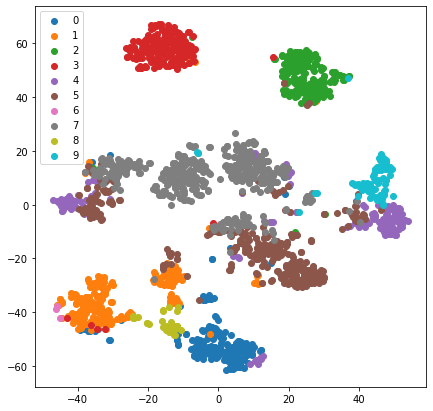

In [55]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pca_pred)

## 4. 마무리

Text(0.5, 1.0, 'PCA Clustering')

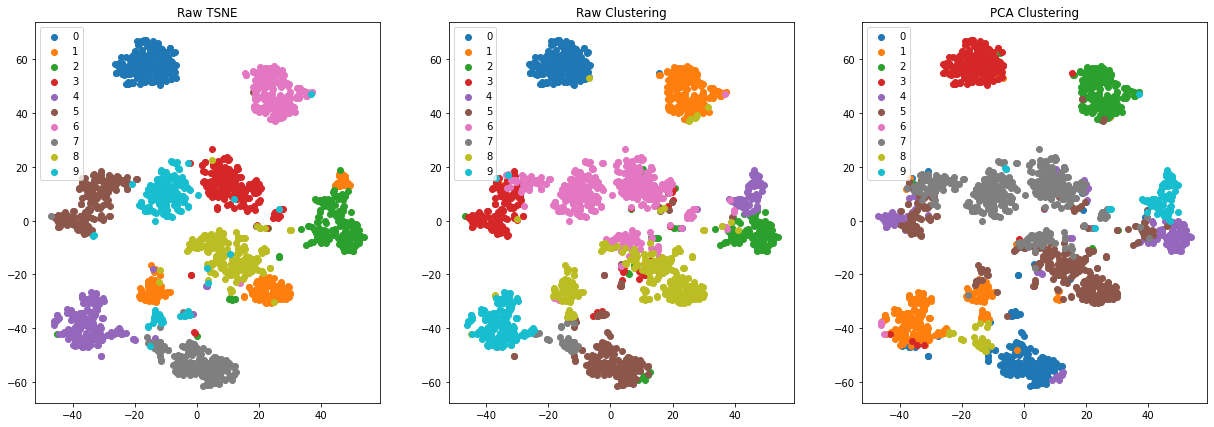

In [56]:
plt.figure(figsize=(21, 7))
plt.subplot(131)
visualize_latent_space_with_label(tsne_latent, target)
plt.title("Raw TSNE")
plt.subplot(132)
visualize_latent_space_with_label(tsne_latent, pred)
plt.title("Raw Clustering")
plt.subplot(133)
visualize_latent_space_with_label(tsne_latent, pca_pred)
plt.title("PCA Clustering")

In [57]:
scaled_data.shape

(1797, 64)

In [58]:
pca_data.shape

(1797, 12)

---

# Eigenface를 이용한 차원 축소 & SVM을 이용한 분류

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

### 1.1 Data Load

In [60]:
# data load 시간 좀 걸림

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [61]:
data, target = faces["data"], faces["target"]

### 1.2 Data EDA

이미지의 height와 width를 확인하면

In [62]:
n_samples, h, w = faces.images.shape

In [63]:
n_samples, h, w

(1288, 50, 37)

얼굴주인들의 이름 확인

In [64]:
target_names = faces.target_names
n_classes = target_names.shape[0]

In [65]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

이미지를 실제로 확인해보면

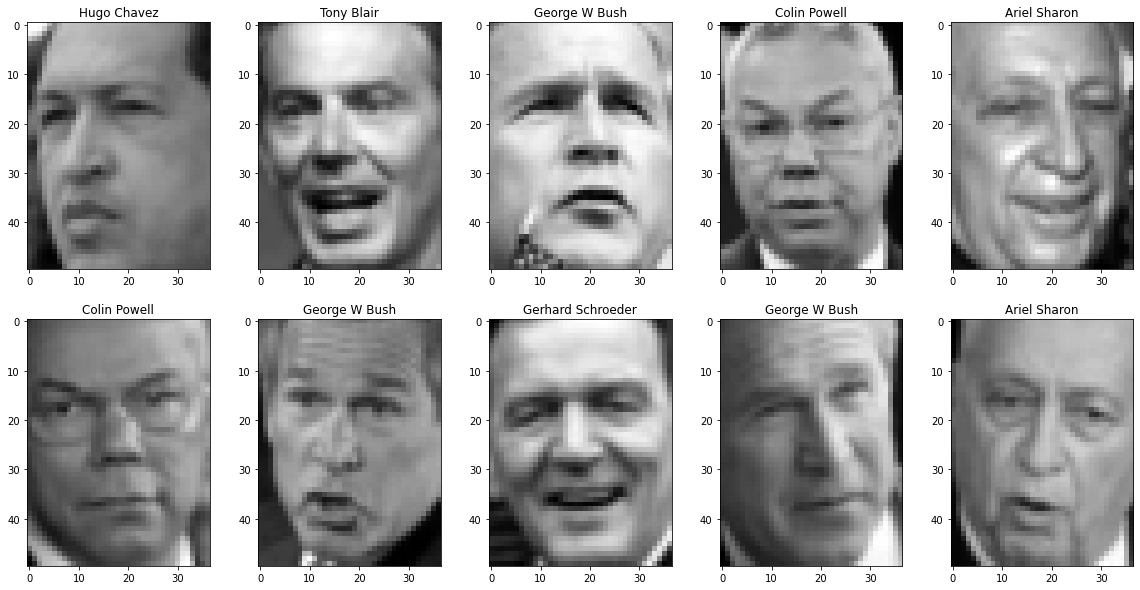

In [66]:
samples = data[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(target_names[target[idx]])

### 1.3 Data Split

In [67]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [68]:
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 901, 0.70
test_data size: 387, 0.30


### 1.4 Data Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [70]:
scaler.fit(train_data)

StandardScaler()

In [71]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

## 2. Eigenface 

Eigenface?

PCA를 이용해 얼굴 사진을 축소하면 생기는 eigenvector가 얼굴 모양과 같다고 하여서 생긴 용어 

Eigenface 생성해보자

### 2.1 학습

PCA로 데이터 압축

In [72]:
from sklearn.decomposition import PCA

pca = PCA()

In [73]:
pca.fit(scaled_train_data)

PCA()

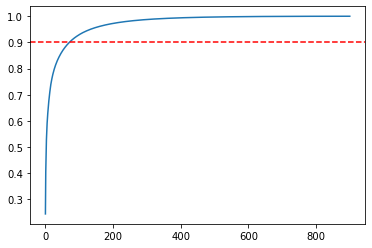

In [74]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(0.9, color="red", linestyle="--")

--> explained variance ratio = 0.9가 되는 지점의 component를 사용하자

In [75]:
pca = PCA(n_components=0.9)
pca.fit(scaled_train_data)

PCA(n_components=0.9)

In [76]:
pca_train_data = pca.transform(scaled_train_data)
pca_test_data = pca.transform(scaled_test_data)

### 2.2 시각화

pca로 학습한 eigen vector를 시각화하면?

(PCA를 통해 다음 eigen vector에 나오는 얼굴의 특징을 추출한다는 의미로 받아들이면 됨)

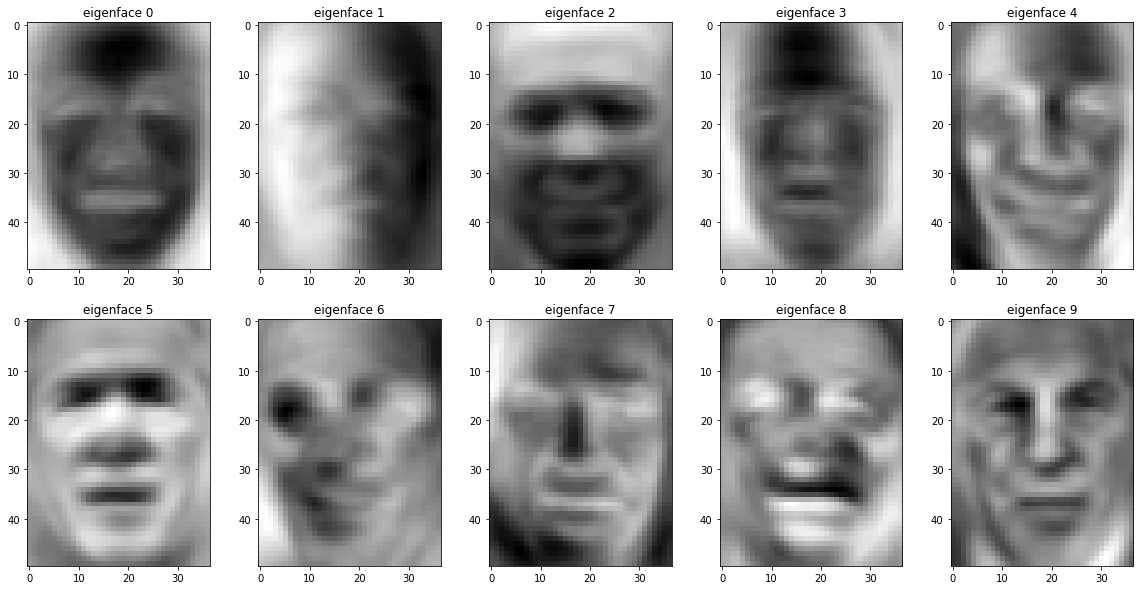

In [77]:
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
samples = eigenfaces[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(f"eigenface {idx}")

## 3. SVM

### 3.1 Raw Data

우선 앞선 SVM 실습에서 진행했던 Baseline의 결과

In [78]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(scaled_train_data, train_target)

SVC()

In [79]:
train_pred = svm.predict(scaled_train_data)
test_pred = svm.predict(scaled_test_data)

In [80]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [81]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.9567
test accuracy is 0.7339


### 3.2 Eigenface

Eigenface로 추출된 특징만으로 SVM을 학습시킨 후의 결과

In [82]:
eigenface_svm = SVC()
eigenface_svm.fit(pca_train_data, train_target)

SVC()

In [83]:
pca_train_pred = eigenface_svm.predict(pca_train_data)
pca_test_pred = eigenface_svm.predict(pca_test_data)

In [84]:
pca_train_acc = accuracy_score(train_target, pca_train_pred)
pca_test_acc = accuracy_score(test_target, pca_test_pred)

In [85]:
print(f"Eigenface train accuracy is {pca_train_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Eigenface train accuracy is 0.9390
Eigenface test accuracy is 0.7364


## 4. 마무리

In [86]:
train_data.shape

(901, 1850)

In [87]:
pca_train_data.shape

(901, 72)

In [88]:
print(f"Baseline test accuracy is {test_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Baseline test accuracy is 0.7339
Eigenface test accuracy is 0.7364
